In [9]:
from sklearn.datasets import make_classification, make_blobs, make_biclusters

In [47]:
X,y = make_blobs(n_features=2, n_samples=100, centers=2)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

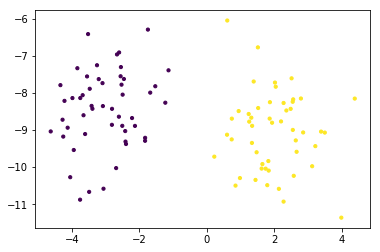

In [15]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

### Agenda
* Understand Linear model for classification
* Maths being it
* Examples

### Understand Linear Model for Classification
* It's a linear model - trying to predict line or place
* In this case, it's trying to predict a line which best separates the two classes

* y = w0*x1 + w1
* out_class = logit(y)

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281880/image4_gw5mmv.png">

In [17]:
import numpy as np

In [19]:
#No matter what is x, it bring the number in the scale of 0-1
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [23]:
sigmoid(-10)

4.5397868702434395e-05

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()

In [26]:
y

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [52]:
lr.fit(X,y)

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lr.coef_

array([[ 2.20708036, -0.13118643]])

In [32]:
np.round(lr.predict_proba(X[:2]),2)

array([[0.02, 0.98],
       [0.15, 0.85]])

In [34]:
lr.coef_ * X[:2] + lr.intercept_

array([[2.73033782, 1.10146896],
       [0.44604235, 1.22533761]])

In [35]:
X[:1]

array([[ 1.25950048, -8.77339175]])

In [37]:
y = 2.20708036 * 1.25950048 + (-0.13118643)*(-8.77339175) + lr.intercept_

In [38]:
sigmoid(y)

array([0.97979252])

### Important Notes
* https://www.holehouse.org/mlclass/06_Logistic_Regression.html
* Linear model just predicts line similar to Linear Regression
* Output of Linear Model is continues in nature & needs to be converted to discrete in nature
* For this Logistic Regression applies sigmoid on continues data thus converting in range of 0 & 1
* For Biclass, 0-.5 is class 0 & 0.5 to 1 is class 1

* Loss function of Logistic Regression = sigmoid(w1*x1 + w0)
* Gradient Descent works on this loss

In [53]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [54]:
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

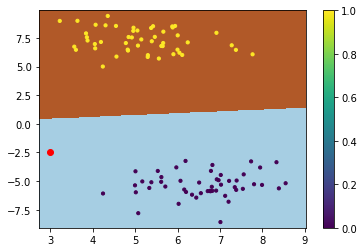

In [58]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.colorbar()
plt.scatter(x=[3],y=[-2.5],c='r')

In [56]:
lr.predict([[3,-2.5]])

array([0])

In [60]:
lr.predict_proba([[3,-2.5]])

array([[0.95872105, 0.04127895]])

In [61]:
lr.predict_proba([[3,0.1]])

array([[0.60076875, 0.39923125]])

### Predicting Employee Exit

In [63]:
import pandas as pd
hr_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [65]:
hr_data.rename(columns={'sales':'dept'}, inplace=True)

In [66]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [82]:
target = hr_data.left

In [83]:
hr_data = hr_data.drop(columns=['left'])

In [67]:
### Identify the cat columns

In [69]:
hr_data.select_dtypes(include=['object']).head()

,dept,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [76]:
### Identify the num columns

In [84]:
hr_data.select_dtypes(exclude=['object']).head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [74]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [71]:
oe = OrdinalEncoder()

In [73]:
en_hr_data = oe.fit_transform(hr_data.select_dtypes(include=['object']))

In [75]:
ss = StandardScaler()

In [85]:
ss_hr_data = ss.fit_transform(hr_data.select_dtypes(exclude=['object']))

In [86]:
complete_tf_data = np.hstack([ss_hr_data, en_hr_data])

In [88]:
complete_tf_data.shape

(14999, 9)

In [89]:
lr = LogisticRegression()

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
trainX, testX, trainY, testY = train_test_split(complete_tf_data, target)

In [93]:
lr.fit(trainX, trainY)

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
lr.coef_.shape

(1, 9)

In [95]:
lr.score(testX,testY)

0.7682666666666667

### Polynomial Regression
* Many times, target is more function of derivative of data rather than exact data
* In the above example, Decision coundry will be a circle
* We all know circle is function of x^2 & y^2
* That's what the Logistic Regression also predicts

In [98]:
X,y = make_circles(n_samples=1000, noise=.04)

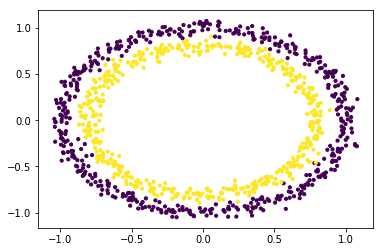

In [99]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [101]:
from sklearn.preprocessing import PolynomialFeatures

In [102]:
pol = PolynomialFeatures(degree=2)

In [104]:
pol.fit_transform([[2,3],
                   [3,4]])

array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.]])

In [107]:
X_tf = pol.fit_transform(X)

In [109]:
lr.fit(X_tf,y)

/home/awantik/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
np.round(lr.coef_,2)

array([[ 4.03,  0.02,  0.  , -9.9 , -0.06, -9.82]])

In [120]:
from sklearn.datasets import make_regression
X,y = make_regression(n_features=1, n_samples=100, noise=5)

In [122]:
y = np.square(y)

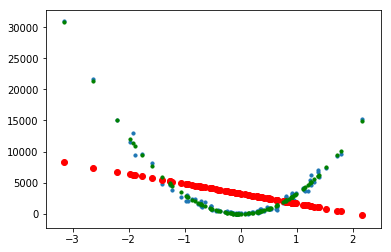

In [136]:
plt.scatter(X,y,s=10)
plt.scatter(X,out,c='r')
plt.scatter(X,out_tf,c='g',s=10)

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
lr = LinearRegression()

In [126]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
out = lr.predict(X)

In [130]:
pol = PolynomialFeatures(degree=2)

In [131]:
X_tf = pol.fit_transform(X)

In [132]:
lr.fit(X_tf,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
out_tf = lr.predict(X_tf)